# Step #1: Explore and prep data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv("../baseline_dataset/0to20k_wa_baseline_train.csv", delimiter=',', index_col=0)
test_data = pd.read_csv("../baseline_dataset/0to20k_wa_baseline_test.csv", delimiter=',', index_col=0)

In [3]:
pd.set_option('display.max_columns', None)
train_data.describe()

,MEDCAUSE,COUNTY,CITY,ACC_DATE,ACCYR,MONTH,WEEKDAY,TIME,TOT_INJ,NO_PEDS,NUMVEHS,ST_FUNC,RUR_URB,V1CMPDIR,V1EVENT1,V1DIRCDE,ACCTYPE,V2CMPDIR,V2EVENT1,V2DIRCDE,SEVERITY,OBJECT1,OBJECT2,LOC_TYPE,RDSURF,LIGHT,LOC_CHAR,WKZONE,ALCFLAG,RODWYCLS,CITY_NAME,ACCESS_CONTROL,LANE_COUNT,MEDIAN_WIDTH,MEDIAN_BARRIER,ROAD_WIDTH,RIGHT_SHOULDER_WIDTH,LEFT_SHOULDER_SURFACE,LEFT_SHOULDER_WIDTH,SPECIAL_USE_LANE_ROAD_SIDE,SPEED_LIMIT,LANE_SURFACE_TYPE,TOTAL_AADT,DIVIDED_INDICATOR,SEATPOS_0,AGE_0,SEX_0,REST1_0,HELMET_0,DRASSESS_1,CONTRIB1_1,CONTRIB2_1,VEH_USE_1,DRV_ACTN_1,VEHCOND1_1,VEHCOND2_1,VEHCOND3_1,INTER_A_1,CMAXLES_1,DRAIRBAG_1,DRV_EJCT_1,SEATPOS_1,AGE_1,SEX_1,REST1_1,HELMET_1,DRASSESS_2,CONTRIB1_2,CONTRIB2_2,VEH_USE_2,DRV_ACTN_2,VEHCOND1_2,VEHCOND2_2,VEHCOND3_2,INTER_A_2,CMAXLES_2,DRAIRBAG_2,DRV_EJCT_2,SEATPOS_2,AGE_2,SEX_2,REST1_2,HELMET_2,DRASSESS_3,CONTRIB1_3,CONTRIB2_3,VEH_USE_3,DRV_ACTN_3,VEHCOND1_3,VEHCOND2_3,VEHCOND3_3,INTER_A_3,CMAXLES_3,DRAIRBAG_3,DRV_EJCT_3,ROUTE_MILEPOST
count,15014.0,15014.000000,15014.000000,15014.000000,15014.0,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.0,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000,15014.0,15014.0,15014.000000,15014.000000,15014.000000,15014.000000,15014.000000
mean,0.0,9.345677,27.103104,15.485414,2022.0,5.906687,4.112029,1315.159185,0.365259,0.010590,1.877581,1.177434,0.165579,3.304249,1.848874,0.719262,2.625949,4.123551,3.142800,1.524577,1.436393,1.809378,0.005795,1.209072,0.336486,0.626016,-0.910017,-0.983882,0.066471,3.352471,27.539297,1.284335,3.268949,10.709072,-0.123019,43.816105,4.836486,-0.531104,1.003130,0.537632,36.808978,1.006594,32437.899294,0.315572,0.090649,37.880635,0.250566,0.464100,-0.344812,0.007393,4.563008,0.202344,-0.526642,2.484681,0.087918,-0.996670,-0.999933,-0.953377,-0.885973,0.694818,-0.044758,-0.006394,39.061852,0.090249,0.065339,-0.608898,-0.309578,-0.601305,-0.961769,-0.293193,3.083455,-0.256561,-0.999600,-1.0,-0.959305,-0.902691,-0.047489,-0.348608,-0.535101,36.530246,-0.544292,-0.535767,-0.927001,-0.954443,-0.970161,-0.997203,-0.947915,-0.530305,-0.896297,-1.0,-1.0,-0.996736,-0.992940,-0.882110,-0.909684,37069.997205
std,0.0,9.046237,32.284874,8.944854,0.0,3.369932,1.926194,539.571743,0.688126,0.116944,0.645991,1.652671,0.371714,2.426158,2.465456,0.936529,2.968667,2.645359,1.290689,1.337490,0.797767,7.277893,4.134894,2.038736,0.751653,1.251897,0.509513,0.142790,0.249112,2.470322,32.882733,2.018320,1.460280,29.422499,1.661724,20.229278,4.370715,0.917534,2.300262,1.038083,21.682568,0.622003,41918.182718,0.464759,0.287582,17.110693,0.610275,1.175137,1.167110,1.000239,6.025401,4.150095,1.295609,3.160276,0.678820,0.138944,0.008161,0.276450,0.718335,1.509261,0.444474,0.652781,15.644311,0.748128,1.134553,0.928664,0.950135,2.186706,0.657289,1.369014,3.161166,0.520270,0.030535,0.0,0.262455,0.667385,1.207427,0.513936,0.725358,10.609807,0.734712,0.997909,0.306895,0.210438,0.437884,0.092294,0.304638,1.540841,0.307279,0.0,0.0,0.072467,0.162257,0.481962,0.288727,34031.915560
min,0.0,0.000000,-1.00

array([[<Axes: title={'center': 'TOT_INJ'}>,
        <Axes: title={'center': 'ACCTYPE'}>],
       [<Axes: title={'center': 'SEVERITY'}>, <Axes: >]], dtype=object)

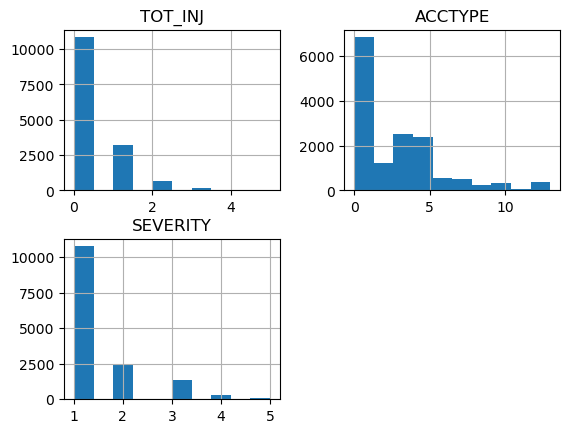

In [4]:
train_data.hist(column=["TOT_INJ", "ACCTYPE", "SEVERITY"])

In [5]:
train_data.drop(['MEDCAUSE', 'ACCYR', 'VEHCOND2_3', 'VEHCOND3_3', 'VEHCOND3_2'], axis=1, inplace=True)
train_data.fillna({'AGE_0': train_data['AGE_0'].mean()}, inplace=True)
train_data.fillna({'AGE_1': train_data['AGE_1'].mean()}, inplace=True)
train_data.fillna({'AGE_2': train_data['AGE_2'].mean()}, inplace=True)
# train_data.dropna(inplace=True)
train_data = train_data.ffill()

In [6]:
test_data.drop(['MEDCAUSE', 'ACCYR', 'VEHCOND2_3', 'VEHCOND3_3', 'VEHCOND3_2'], axis=1, inplace=True)
test_data.fillna({'AGE_0': test_data['AGE_0'].mean()}, inplace=True)
test_data.fillna({'AGE_1': test_data['AGE_1'].mean()}, inplace=True)
test_data.fillna({'AGE_2': test_data['AGE_2'].mean()}, inplace=True)
# test_data.dropna(inplace=True)
# test_data.interpolate()
test_data = test_data.ffill()

In [7]:
train_data.head()

,COUNTY,CITY,ACC_DATE,MONTH,WEEKDAY,TIME,TOT_INJ,NO_PEDS,NUMVEHS,ST_FUNC,RUR_URB,V1CMPDIR,V1EVENT1,V1DIRCDE,ACCTYPE,V2CMPDIR,V2EVENT1,V2DIRCDE,SEVERITY,OBJECT1,OBJECT2,LOC_TYPE,RDSURF,LIGHT,LOC_CHAR,WKZONE,ALCFLAG,RODWYCLS,CITY_NAME,ACCESS_CONTROL,LANE_COUNT,MEDIAN_WIDTH,MEDIAN_BARRIER,ROAD_WIDTH,RIGHT_SHOULDER_WIDTH,LEFT_SHOULDER_SURFACE,LEFT_SHOULDER_WIDTH,SPECIAL_USE_LANE_ROAD_SIDE,SPEED_LIMIT,LANE_SURFACE_TYPE,TOTAL_AADT,DIVIDED_INDICATOR,SEATPOS_0,AGE_0,SEX_0,REST1_0,HELMET_0,DRASSESS_1,CONTRIB1_1,CONTRIB2_1,VEH_USE_1,DRV_ACTN_1,VEHCOND1_1,VEHCOND2_1,VEHCOND3_1,INTER_A_1,CMAXLES_1,DRAIRBAG_1,DRV_EJCT_1,SEATPOS_1,AGE_1,SEX_1,REST1_1,HELMET_1,DRASSESS_2,CONTRIB1_2,CONTRIB2_2,VEH_USE_2,DRV_ACTN_2,VEHCOND1_2,VEHCOND2_2,INTER_A_2,CMAXLES_2,DRAIRBAG_2,DRV_EJCT_2,SEATPOS_2,AGE_2,SEX_2,REST1_2,HELMET_2,DRASSESS_3,CONTRIB1_3,CONTRIB2_3,VEH_USE_3,DRV_ACTN_3,VEHCOND1_3,INTER_A_3,CMAXLES_3,DRAIRBAG_3,DRV_EJCT_3,ROUTE_MILEPOST
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EC38196,17,75,12,4,3,700,0,0,2,2,0,6,1,2,7,5,3,2,1,-1,-1,1,0,0,-1,-1,0,1,76,1,3,0,-1,36,0,-1,0,0,35,1,23000,0,0,51.000000,1,0,-1,1,0,-1,0,1,0,-1,-1,-1,-1,0,0,0,18.000000,0,0,-1,1,-1,-1,1,5,0,-1,-1,-1,0,0,-1,36.519302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,78006.00
EC95661,0,83,16,10,1,1100,0,0,4,0,0,1,1,1,0,5,2,2,1,-1,-1,6,0,0,-1,-1,0,1,87,3,4,0,-1,73,0,-1,0,0,30,1,26000,0,0,26.000000,0,0,-1,-1,2,-1,0,5,0,-1,-1,-1,-1,0,0,0,37.000000,0,0,-1,-1,-1,-1,1,3,0,-1,-1,-1,0,0,0,38.000000,0,0,-1,-1,2,-1,0,1,0,-1,-1,0,0,58007.34
EC10861,8,30,7,1,6,900,1,0,2,2,0,6,1,1,1,5,1,4,2,-1,-1,7,1,0,-1,-1,0,3,29,2,2,8,0,28,0,-1,0,0,25,1,3300,1,0,37.909049,-1,2,1,-1,7,-1,-1,1,0,-1,-1,-1,-1,3,0,0,57.000000,1,0,3,-1,-1,-1,-1,1,0,-1,-1,-1,0,0,-1,36.519302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,40003.10
EC84147,0,29,7,9,4,700,0,0,2,1,0,3,16,0,5,3,3,0,1,-1,-1,6,0,0,-1,-1,0,0,28,-1,1,0,-1,12,13,1,4,0,0,1,0,0,0,37.000000,1,0,2,-1,0,-1,0,2,0,-1,-1,-1,-1,0,0,0,48.000000,0,0,1,-1,-1,-1,-1,5,0,-1,1,4,0,0,-1,36.519302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4000.60
EC25243,17,8,26,2,7,400,1,0,1,1,0,6,1,1,3,6,4,3,3,22,-1,0,0,1,-1,-1,1,5,8,0,5,48,3,57,9,1,6,3,60,1,123000,1,0,24.000000,0,0,-1,1,10,11,-1,1,0,-1,-1,-1,-1,4,0,-1,39.079146,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,36.519302,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,4025.30


In [17]:
y1_train = train_data["TOT_INJ"]

In [8]:
X_train = train_data.drop(columns=["TOT_INJ", "ACCTYPE", "SEVERITY"], axis=1)
X_test = test_data.drop(columns=["TOT_INJ", "ACCTYPE", "SEVERITY"], axis=1)

label_encoder = LabelEncoder()
y1_train = label_encoder.fit_transform(train_data["TOT_INJ"])
y1_test = label_encoder.transform(test_data["TOT_INJ"])
# y1_train = train_data["TOT_INJ"]
# y1_test = test_data["TOT_INJ"]

label_encoder = LabelEncoder()
y2_train = label_encoder.fit_transform(train_data["ACCTYPE"])
y2_test = label_encoder.transform(test_data["ACCTYPE"])

label_encoder = LabelEncoder()
y3_train = label_encoder.fit_transform(train_data["SEVERITY"])
y3_test = label_encoder.transform(test_data["SEVERITY"])

print(X_train.shape)
print(y1_train.shape)

(15014, 88)
(15014,)


In [19]:
def plot_distribution(df, column):
    ax = sns.histplot(data=df, x=column)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.xlabel(column)
    plt.ylabel('NUM')
    plt.title(f'Distribution of {column}')
    plt.show()


In [20]:
def get_acc(model, x_test, y_test, label):
    score = model.score(x_test, y_test) * 100
    print(f"Score - {label}:", score)

    predictions = model.predict(x_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"{label}: Accuracy:", accuracy)

    precision = precision_score(y1_test, predictions, average='weighted')
    print(f"{label}: Precision:", precision)

    recall = recall_score(y1_test, predictions, average='weighted')
    print(f"{label}: Recall:", recall)

    f1 = f1_score(y1_test, predictions, average='weighted')
    print(f"{label}: F1:", f1)


    step = model.best_estimator_.steps[1]
    model_to_save = step[1]
    try:
        plot_importance(model_to_save, max_num_features=20, title=f'Feature Importance - {label}')
        plt.savefig(f'models/{model_to_save.__class__.__name__}_feature_importance_{label}.png')
    except:
        pass

    model_name = f'models/{model_to_save.__class__.__name__}_{label}_{score:.2f}'
    # joblib.dump(xgboost_opt, f'{model_name}.pkl')

    import re
    import os
    last_model_name = [item for item in os.listdir('models') if item.startswith(f'{model.__class__.__name__}_{label}_')]
    if len(last_model_name) == 0:
        joblib.dump(model, f'{model_name}.pkl')
        return model, score
    last_model_name = last_model_name[0]
    last_model_precision = float(re.findall(r'\d+\.\d+', last_model_name)[0])
    if score > last_model_precision:
        os.remove(f'models/{last_model_name}')
        joblib.dump(model, f'{model_name}.pkl')

In [21]:
def confusion_matrix_plot(model, x_test, y_test, label):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'models/{model.__class__.__name__}_confusion_matrix_{label}.png')
    plt.show()
    print(cm)  # Print the confusion matrix

# Step #2: Build a pipeline of baselines

# Random forest

In [23]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from sklearn.ensemble import RandomForestClassifier

rf_estimators = [
    ('encoder', TargetEncoder()),
    ('clf', RandomForestClassifier()) # can customize objective function with the objective parameter
]
rf_pipe = Pipeline(steps=rf_estimators)
rf_pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf', RandomForestClassifier())])

In [19]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

rf_search_space = {
    'clf__n_estimators': Integer(120,240),
    'clf__max_features': Categorical(['sqrt', 'log2']),
    'clf__max_depth': Integer(2, 15),
    'clf__min_samples_split': Real(1e-10, 1-1e-10),
    'clf__min_samples_leaf': Real(1e-10, 1-1e-10),
    'clf__min_weight_fraction_leaf' : Real(0, 0.5),
    'clf__max_leaf_nodes': Integer(2, 100),
    'clf__n_jobs': Integer(1, 3),
    'clf__max_samples': Real(1e-10, 1.0),
    'clf__class_weight': Categorical(['balanced', 'balanced_subsample'])
}

rf_opt = BayesSearchCV(rf_pipe, rf_search_space, n_iter=45, random_state=8, cv=5) 

In [20]:
%%capture
rf_opt.fit(X_train, y1_train)

In [21]:
get_acc(rf_opt, X_test, y1_test, 'TOT_INJ')

Score - TOT_INJ: 35.273159144893114
TOT_INJ: Accuracy: 0.3527315914489311
TOT_INJ: Precision: 0.12441957560609565
TOT_INJ: Recall: 0.3527315914489311
TOT_INJ: F1: 0.18395308632191842


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', RandomForestClassifier())]),
               n_iter=45, random_state=8,
               search_spaces={'clf__class_weight': Categorical(categories=('balanced', 'balanced_subsample'), prior=None),
                              'clf__max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                              'clf__max_features': Categorical(cat...
                              'clf__min_samples_leaf': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_samples_split': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize'),
                              'clf__n_estimators': Integer(low=120, high=240, prior='uniform'

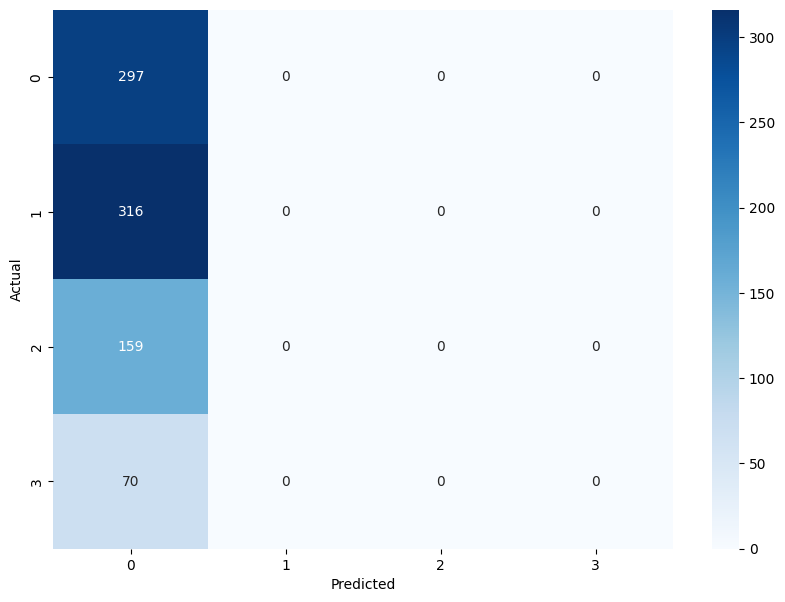

[[297   0   0   0]
 [316   0   0   0]
 [159   0   0   0]
 [ 70   0   0   0]]


In [22]:
try:
    confusion_matrix_plot(rf_opt, X_test, y1_test, 'TOT_INJ')
except:
    pass

In [29]:
%%capture
rf_opt.fit(X_train, y2_train)

In [30]:
get_acc(rf_opt, X_test, y2_test, 'ACCTYPE')

Score - ACCTYPE: 38.40490797546012
ACCTYPE: Accuracy: 0.38404907975460123
ACCTYPE: Precision: 0.2594396336630757
ACCTYPE: Recall: 0.1705521472392638
ACCTYPE: F1: 0.2057608003313575


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', RandomForestClassifier())]),
               n_iter=45, random_state=8,
               search_spaces={'clf__class_weight': Categorical(categories=('balanced', 'balanced_subsample'), prior=None),
                              'clf__max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                              'clf__max_features': Categorical(cat...
                              'clf__min_samples_leaf': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_samples_split': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize'),
                              'clf__n_estimators': Integer(low=120, high=240, prior='uniform'

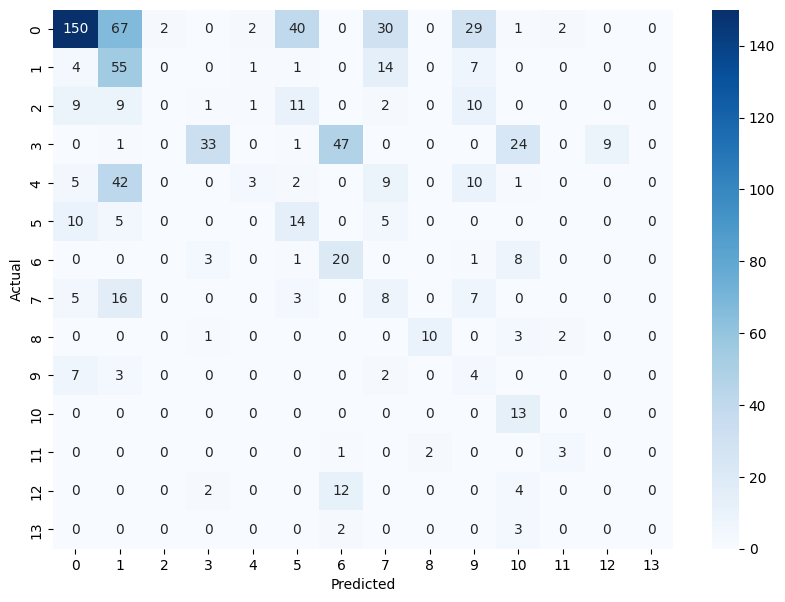

[[150  67   2   0   2  40   0  30   0  29   1   2   0   0]
 [  4  55   0   0   1   1   0  14   0   7   0   0   0   0]
 [  9   9   0   1   1  11   0   2   0  10   0   0   0   0]
 [  0   1   0  33   0   1  47   0   0   0  24   0   9   0]
 [  5  42   0   0   3   2   0   9   0  10   1   0   0   0]
 [ 10   5   0   0   0  14   0   5   0   0   0   0   0   0]
 [  0   0   0   3   0   1  20   0   0   1   8   0   0   0]
 [  5  16   0   0   0   3   0   8   0   7   0   0   0   0]
 [  0   0   0   1   0   0   0   0  10   0   3   2   0   0]
 [  7   3   0   0   0   0   0   2   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  13   0   0   0]
 [  0   0   0   0   0   0   1   0   2   0   0   3   0   0]
 [  0   0   0   2   0   0  12   0   0   0   4   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   3   0   0   0]]


In [31]:
try:
    confusion_matrix_plot(rf_opt, X_test, y2_test, 'ACCTYPE')
except:
    pass

In [32]:
%%capture
rf_opt.fit(X_train, y3_train)

In [33]:
get_acc(rf_opt, X_test, y3_test, 'SEVERITY')

Score - SEVERITY: 33.86503067484662
SEVERITY: Accuracy: 0.33865030674846625
SEVERITY: Precision: 0.1240076781211186
SEVERITY: Recall: 0.3521472392638037
SEVERITY: F1: 0.18342333515192683


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', RandomForestClassifier())]),
               n_iter=45, random_state=8,
               search_spaces={'clf__class_weight': Categorical(categories=('balanced', 'balanced_subsample'), prior=None),
                              'clf__max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                              'clf__max_features': Categorical(cat...
                              'clf__min_samples_leaf': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_samples_split': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize'),
                              'clf__n_estimators': Integer(low=120, high=240, prior='uniform'

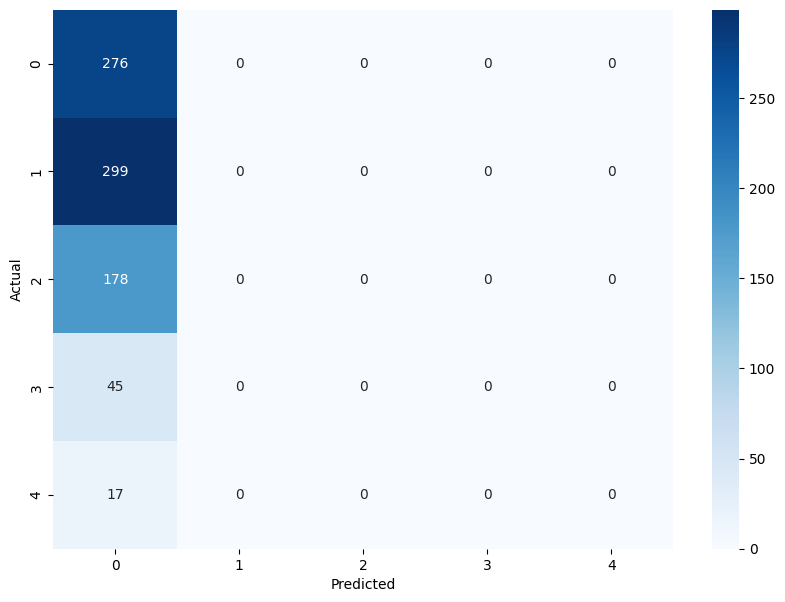

[[276   0   0   0   0]
 [299   0   0   0   0]
 [178   0   0   0   0]
 [ 45   0   0   0   0]
 [ 17   0   0   0   0]]


In [34]:
try:
    confusion_matrix_plot(rf_opt, X_test, y3_test, 'SEVERITY')
except:
    pass

# LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression

lr_estimators = [
    ('encoder', TargetEncoder()),
    ('clf', LogisticRegression()) # can customize objective function with the objective parameter
]
lr_pipe = Pipeline(steps=lr_estimators)
lr_pipe

Pipeline(steps=[('encoder', TargetEncoder()), ('clf', LogisticRegression())])

In [24]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

lr_search_space = {
    'clf__tol': Real(0, 1),
    'clf__max_iter': Integer(300, 400),
    'clf__multi_class': Categorical(['auto', 'ovr', 'multinomial']),
    'clf__n_jobs': Integer(1, 3)
}

lr_opt = BayesSearchCV(lr_pipe, lr_search_space, cv=5, n_iter=15, random_state=8) 

In [25]:
%%capture
lr_opt.fit(X_train, y1_train)

/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [26]:
get_acc(lr_opt, X_test, y1_test, 'TOT_INJ')

Score - TOT_INJ: 35.273159144893114
TOT_INJ: Accuracy: 0.3527315914489311
TOT_INJ: Precision: 0.12441957560609565
TOT_INJ: Recall: 0.3527315914489311
TOT_INJ: F1: 0.18395308632191842


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', LogisticRegression())]),
               n_iter=15, random_state=8,
               search_spaces={'clf__max_iter': Integer(low=300, high=400, prior='uniform', transform='normalize'),
                              'clf__multi_class': Categorical(categories=('auto', 'ovr', 'multinomial'), prior=None),
                              'clf__n_jobs': Integer(low=1, high=3, prior='uniform', transform='normalize'),
                              'clf__tol': Real(low=0, high=1, prior='uniform', transform='normalize')}),
 35.273159144893114)

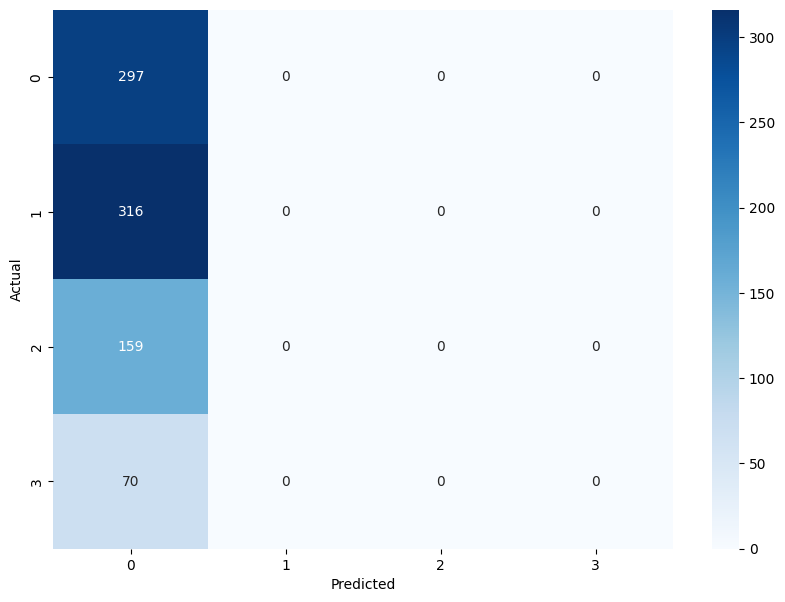

[[297   0   0   0]
 [316   0   0   0]
 [159   0   0   0]
 [ 70   0   0   0]]


In [27]:
try:
    confusion_matrix_plot(lr_opt, X_test, y1_test, 'TOT_INJ')
except:
    pass

In [40]:
%%capture
lr_opt.fit(X_train, y2_train)

/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [41]:
get_acc(lr_opt, X_test, y2_test, 'ACCTYPE')

Score - ACCTYPE: 56.56441717791411
ACCTYPE: Accuracy: 0.5656441717791411
ACCTYPE: Precision: 0.3564328272806357
ACCTYPE: Recall: 0.25644171779141106
ACCTYPE: F1: 0.18791333324252799


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', LogisticRegression())]),
               n_iter=15, random_state=8,
               search_spaces={'clf__max_iter': Integer(low=300, high=400, prior='uniform', transform='normalize'),
                              'clf__multi_class': Categorical(categories=('auto', 'ovr', 'multinomial'), prior=None),
                              'clf__n_jobs': Integer(low=1, high=3, prior='uniform', transform='normalize'),
                              'clf__tol': Real(low=0, high=1, prior='uniform', transform='normalize')}),
 56.56441717791411)

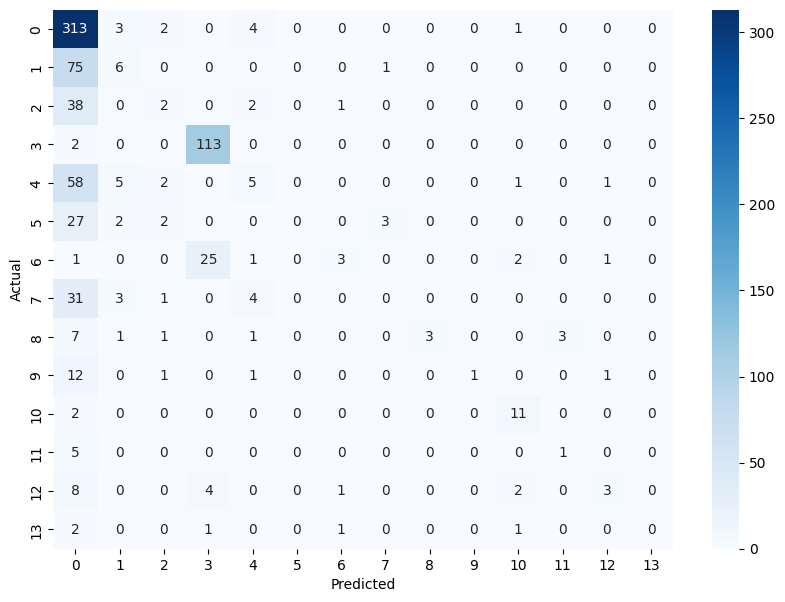

[[313   3   2   0   4   0   0   0   0   0   1   0   0   0]
 [ 75   6   0   0   0   0   0   1   0   0   0   0   0   0]
 [ 38   0   2   0   2   0   1   0   0   0   0   0   0   0]
 [  2   0   0 113   0   0   0   0   0   0   0   0   0   0]
 [ 58   5   2   0   5   0   0   0   0   0   1   0   1   0]
 [ 27   2   2   0   0   0   0   3   0   0   0   0   0   0]
 [  1   0   0  25   1   0   3   0   0   0   2   0   1   0]
 [ 31   3   1   0   4   0   0   0   0   0   0   0   0   0]
 [  7   1   1   0   1   0   0   0   3   0   0   3   0   0]
 [ 12   0   1   0   1   0   0   0   0   1   0   0   1   0]
 [  2   0   0   0   0   0   0   0   0   0  11   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  8   0   0   4   0   0   1   0   0   0   2   0   3   0]
 [  2   0   0   1   0   0   1   0   0   0   1   0   0   0]]


In [42]:
try:
    confusion_matrix_plot(lr_opt, X_test, y2_test, 'ACCTYPE')
except:
    pass

In [43]:
%%capture
lr_opt.fit(X_train, y3_train)

/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [44]:
get_acc(lr_opt, X_test, y3_test, 'SEVERITY')

Score - SEVERITY: 33.86503067484662
SEVERITY: Accuracy: 0.33865030674846625
SEVERITY: Precision: 0.1240076781211186
SEVERITY: Recall: 0.3521472392638037
SEVERITY: F1: 0.18342333515192683


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', LogisticRegression())]),
               n_iter=15, random_state=8,
               search_spaces={'clf__max_iter': Integer(low=300, high=400, prior='uniform', transform='normalize'),
                              'clf__multi_class': Categorical(categories=('auto', 'ovr', 'multinomial'), prior=None),
                              'clf__n_jobs': Integer(low=1, high=3, prior='uniform', transform='normalize'),
                              'clf__tol': Real(low=0, high=1, prior='uniform', transform='normalize')}),
 33.86503067484662)

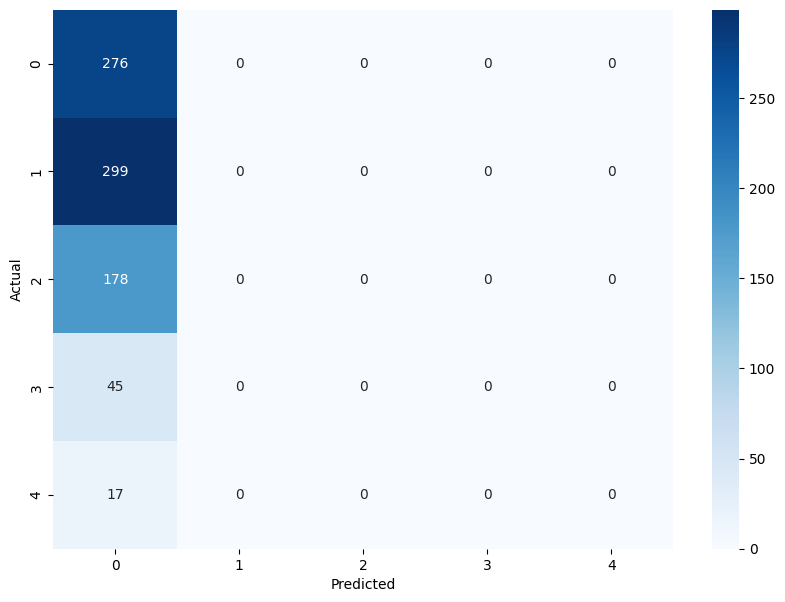

[[276   0   0   0   0]
 [299   0   0   0   0]
 [178   0   0   0   0]
 [ 45   0   0   0   0]
 [ 17   0   0   0   0]]


In [45]:
try:
    confusion_matrix_plot(lr_opt, X_test, y3_test, 'SEVERITY')
except:
    pass

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_estimators = [
    ('encoder', TargetEncoder()),
    ('clf', DecisionTreeClassifier()) # can customize objective function with the objective parameter
]
dt_pipe = Pipeline(steps=dt_estimators)
dt_pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf', DecisionTreeClassifier())])

In [29]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

dt_search_space = {
    'clf__max_features': Categorical(['sqrt', 'log2']),
    'clf__max_depth': Integer(2, 15),
    'clf__min_samples_split': Real(1e-10, 1-1e-10),
    'clf__min_samples_leaf': Real(1e-10, 1-1e-10),
    'clf__min_weight_fraction_leaf' : Real(0, 0.5),
    'clf__max_leaf_nodes': Integer(50, 100)
}

dt_opt = BayesSearchCV(dt_pipe, dt_search_space, cv=5, n_iter=45, random_state=8) 

In [30]:
%%capture
dt_opt.fit(X_train, y1_train)

In [31]:
get_acc(dt_opt, X_test, y1_test, 'TOT_INJ')

Score - TOT_INJ: 35.273159144893114
TOT_INJ: Accuracy: 0.3527315914489311
TOT_INJ: Precision: 0.12441957560609565
TOT_INJ: Recall: 0.3527315914489311
TOT_INJ: F1: 0.18395308632191842


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', DecisionTreeClassifier())]),
               n_iter=45, random_state=8,
               search_spaces={'clf__max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                              'clf__max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                              'clf__max_leaf_nodes': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                              'clf__min_samples_leaf': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_samples_split': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize')}),
 35.273159144893114)

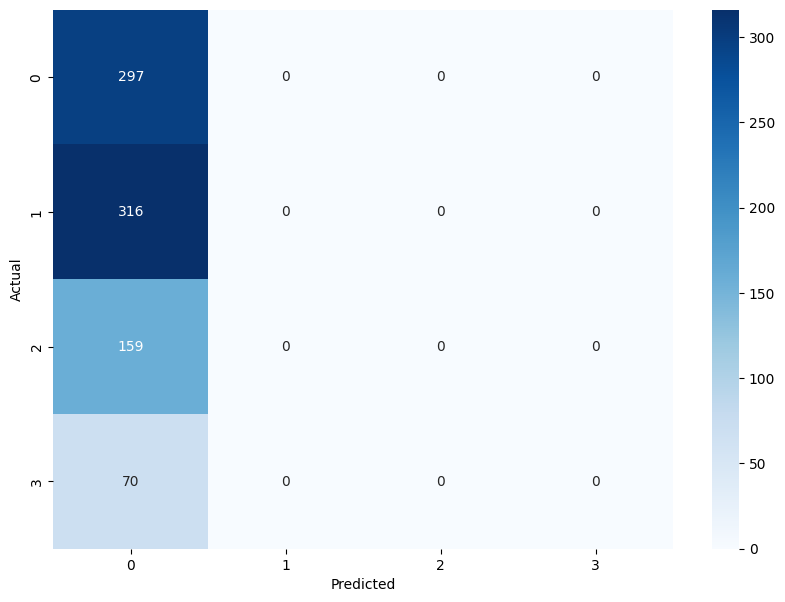

[[297   0   0   0]
 [316   0   0   0]
 [159   0   0   0]
 [ 70   0   0   0]]


In [32]:
try:
    confusion_matrix_plot(dt_opt, X_test, y1_test, 'TOT_INJ')
except:
    pass

In [51]:
%%capture
dt_opt.fit(X_train, y2_train)

In [52]:
get_acc(dt_opt, X_test, y2_test, 'ACCTYPE')

Score - ACCTYPE: 67.73006134969324
ACCTYPE: Accuracy: 0.6773006134969325
ACCTYPE: Precision: 0.31291169001055985
ACCTYPE: Recall: 0.22699386503067484
ACCTYPE: F1: 0.2337248696587651


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', DecisionTreeClassifier())]),
               n_iter=45, random_state=8,
               search_spaces={'clf__max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                              'clf__max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                              'clf__max_leaf_nodes': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                              'clf__min_samples_leaf': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_samples_split': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize')}),
 67.73006134969324)

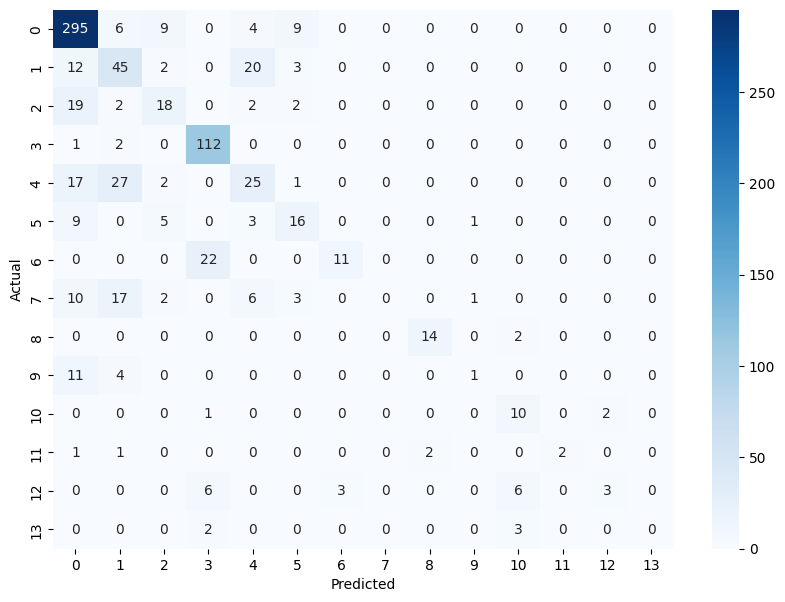

[[295   6   9   0   4   9   0   0   0   0   0   0   0   0]
 [ 12  45   2   0  20   3   0   0   0   0   0   0   0   0]
 [ 19   2  18   0   2   2   0   0   0   0   0   0   0   0]
 [  1   2   0 112   0   0   0   0   0   0   0   0   0   0]
 [ 17  27   2   0  25   1   0   0   0   0   0   0   0   0]
 [  9   0   5   0   3  16   0   0   0   1   0   0   0   0]
 [  0   0   0  22   0   0  11   0   0   0   0   0   0   0]
 [ 10  17   2   0   6   3   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  14   0   2   0   0   0]
 [ 11   4   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  10   0   2   0]
 [  1   1   0   0   0   0   0   0   2   0   0   2   0   0]
 [  0   0   0   6   0   0   3   0   0   0   6   0   3   0]
 [  0   0   0   2   0   0   0   0   0   0   3   0   0   0]]


In [53]:
try:
    confusion_matrix_plot(dt_opt, X_test, y2_test, 'ACCTYPE')
except:
    pass

In [54]:
%%capture
dt_opt.fit(X_train, y3_train)

In [55]:
get_acc(dt_opt, X_test, y3_test, 'SEVERITY')

Score - SEVERITY: 34.7239263803681
SEVERITY: Accuracy: 0.347239263803681
SEVERITY: Precision: 0.1373232793278758
SEVERITY: Recall: 0.3521472392638037
SEVERITY: F1: 0.18785815386146612


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', DecisionTreeClassifier())]),
               n_iter=45, random_state=8,
               search_spaces={'clf__max_depth': Integer(low=2, high=15, prior='uniform', transform='normalize'),
                              'clf__max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                              'clf__max_leaf_nodes': Integer(low=50, high=100, prior='uniform', transform='normalize'),
                              'clf__min_samples_leaf': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_samples_split': Real(low=1e-10, high=0.9999999999, prior='uniform', transform='normalize'),
                              'clf__min_weight_fraction_leaf': Real(low=0, high=0.5, prior='uniform', transform='normalize')}),
 34.7239263803681)

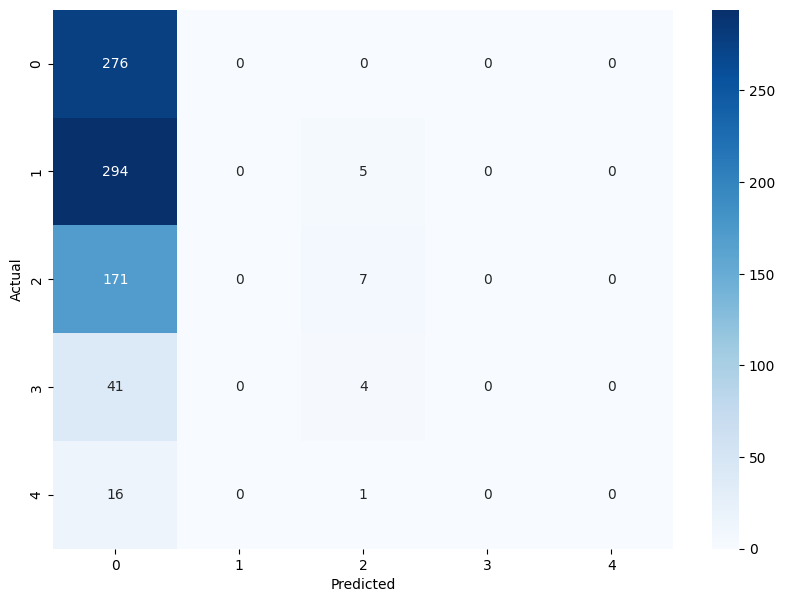

[[276   0   0   0   0]
 [294   0   5   0   0]
 [171   0   7   0   0]
 [ 41   0   4   0   0]
 [ 16   0   1   0   0]]


In [56]:
try:
    confusion_matrix_plot(dt_opt, X_test, y3_test, 'SEVERITY')
except:
    pass

# Adaboost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

adb_estimators = [
    ('encoder', TargetEncoder()),
    ('clf', AdaBoostClassifier()) # can customize objective function with the objective parameter
]
adb_pipe = Pipeline(steps=adb_estimators)
adb_pipe


Pipeline(steps=[('encoder', TargetEncoder()), ('clf', AdaBoostClassifier())])

In [34]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

adb_search_space = {
    'clf__n_estimators': Integer(40,140),
    'clf__learning_rate': Real(1e-4, 1e-3),
    'clf__algorithm': Categorical(['SAMME', 'SAMME.R'])
}

adb_opt = BayesSearchCV(adb_pipe, adb_search_space, cv=5, n_iter=40, random_state=8) 

In [35]:
%%capture
adb_opt.fit(X_train, y1_train)

In [36]:
get_acc(adb_opt, X_test, y1_test, 'TOT_INJ')

Score - TOT_INJ: 35.273159144893114
TOT_INJ: Accuracy: 0.3527315914489311
TOT_INJ: Precision: 0.12441957560609565
TOT_INJ: Recall: 0.3527315914489311
TOT_INJ: F1: 0.18395308632191842


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', AdaBoostClassifier())]),
               n_iter=40, random_state=8,
               search_spaces={'clf__algorithm': Categorical(categories=('SAMME', 'SAMME.R'), prior=None),
                              'clf__learning_rate': Real(low=0.0001, high=0.001, prior='uniform', transform='normalize'),
                              'clf__n_estimators': Integer(low=40, high=140, prior='uniform', transform='normalize')}),
 35.273159144893114)

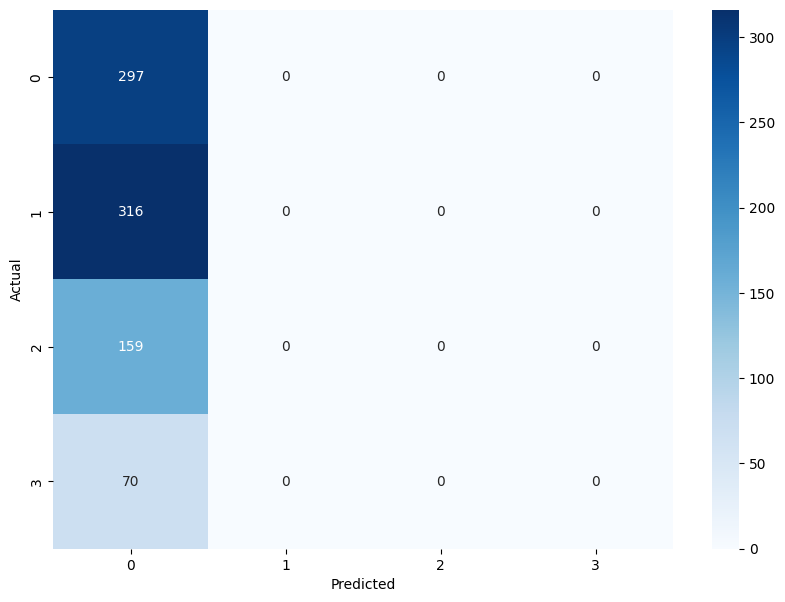

[[297   0   0   0]
 [316   0   0   0]
 [159   0   0   0]
 [ 70   0   0   0]]


In [37]:
try:
    confusion_matrix_plot(adb_opt, X_test, y1_test, 'TOT_INJ')
except:
    pass

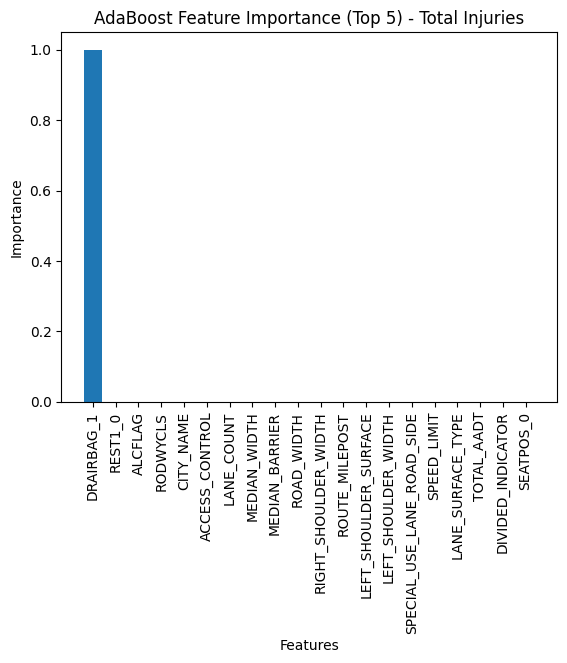

In [38]:
adb_step = adb_opt.best_estimator_.steps[1]
adb_model = adb_step[1]

import matplotlib.pyplot as plt
importances = adb_model.feature_importances_

sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_labels = X_train.columns[sorted_indices]

# Select top 5 importances and labels
top_n = 20
top_importances = sorted_importances[:top_n]
top_labels = sorted_labels[:top_n]

# Create a bar plot
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_labels, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('AdaBoost Feature Importance (Top 5) - Total Injuries')
plt.show()

In [38]:
%%capture
adb_opt.fit(X_train, y2_train)

In [64]:
get_acc(adb_opt, X_test, y2_test, 'ACCTYPE')

Score - ACCTYPE: 57.91411042944785
ACCTYPE: Accuracy: 0.5791411042944785
ACCTYPE: Precision: 0.11742505371643396
ACCTYPE: Recall: 0.25153374233128833
ACCTYPE: F1: 0.1600762545817579


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', AdaBoostClassifier())]),
               n_iter=40, random_state=8,
               search_spaces={'clf__algorithm': Categorical(categories=('SAMME', 'SAMME.R'), prior=None),
                              'clf__learning_rate': Real(low=0.0001, high=0.001, prior='uniform', transform='normalize'),
                              'clf__n_estimators': Integer(low=40, high=140, prior='uniform', transform='normalize')}),
 57.91411042944785)

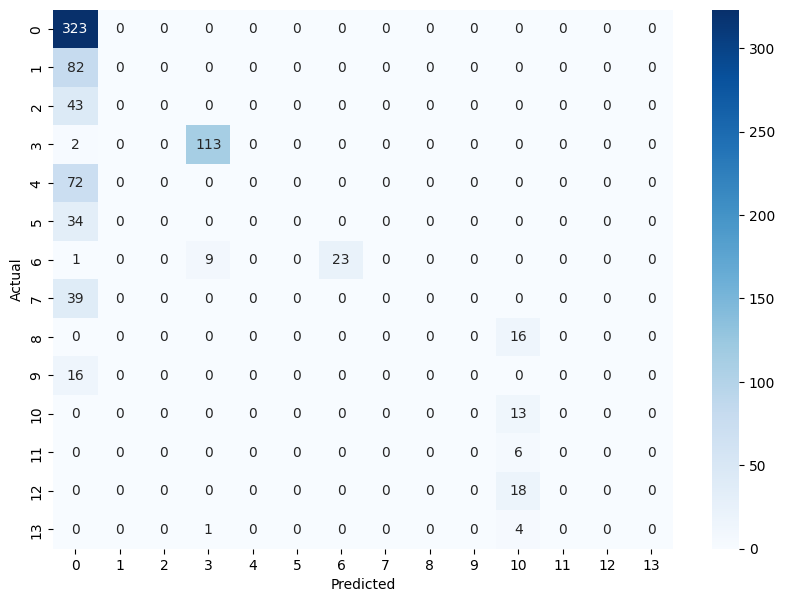

[[323   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 82   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 43   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0 113   0   0   0   0   0   0   0   0   0   0]
 [ 72   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   9   0   0  23   0   0   0   0   0   0   0]
 [ 39   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  16   0   0   0]
 [ 16   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  13   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   4   0   0   0]]


In [65]:
try:
    confusion_matrix_plot(adb_opt, X_test, y2_test, 'ACCTYPE')
except:
    pass

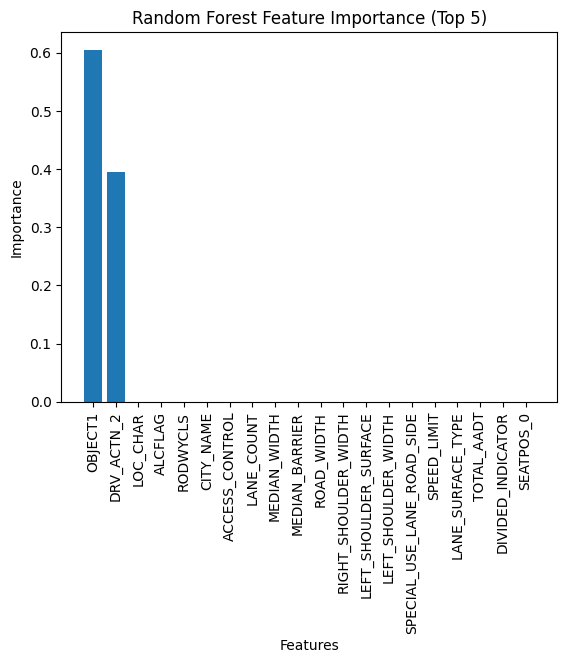

In [66]:
adb_step = adb_opt.best_estimator_.steps[1]
adb_model = adb_step[1]

import matplotlib.pyplot as plt
importances = adb_model.feature_importances_

sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_labels = X_test.columns[sorted_indices]

# Select top 5 importances and labels
top_n = 20
top_importances = sorted_importances[:top_n]
top_labels = sorted_labels[:top_n]

# Create a bar plot
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_labels, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance (Top 5)')
plt.show()

In [67]:
%%capture
adb_opt.fit(X_train, y3_train)

In [68]:
get_acc(adb_opt, X_test, y3_test, 'SEVERITY')

Score - SEVERITY: 33.86503067484662
SEVERITY: Accuracy: 0.33865030674846625
SEVERITY: Precision: 0.1240076781211186
SEVERITY: Recall: 0.3521472392638037
SEVERITY: F1: 0.18342333515192683


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                         ('clf', AdaBoostClassifier())]),
               n_iter=40, random_state=8,
               search_spaces={'clf__algorithm': Categorical(categories=('SAMME', 'SAMME.R'), prior=None),
                              'clf__learning_rate': Real(low=0.0001, high=0.001, prior='uniform', transform='normalize'),
                              'clf__n_estimators': Integer(low=40, high=140, prior='uniform', transform='normalize')}),
 33.86503067484662)

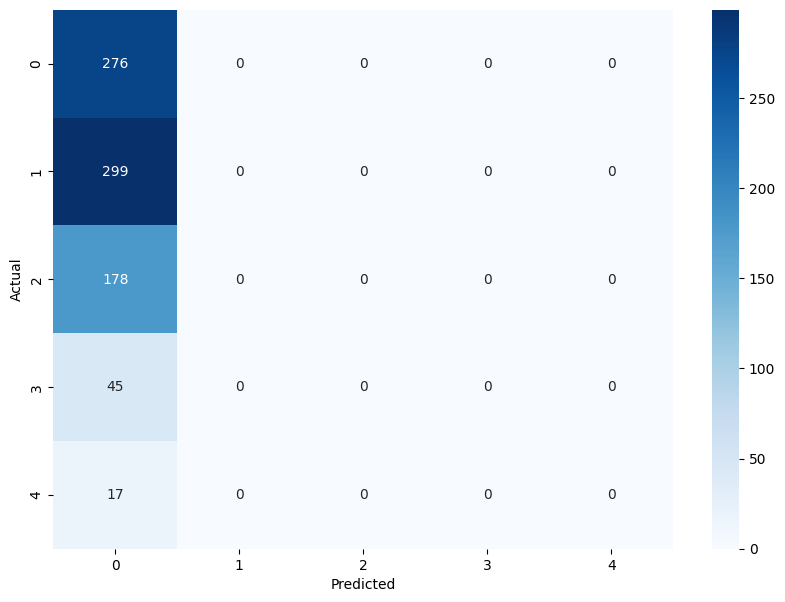

[[276   0   0   0   0]
 [299   0   0   0   0]
 [178   0   0   0   0]
 [ 45   0   0   0   0]
 [ 17   0   0   0   0]]


In [69]:
try:
    confusion_matrix_plot(adb_opt, X_test, y3_test, 'SEVERITY')
except:
    pass

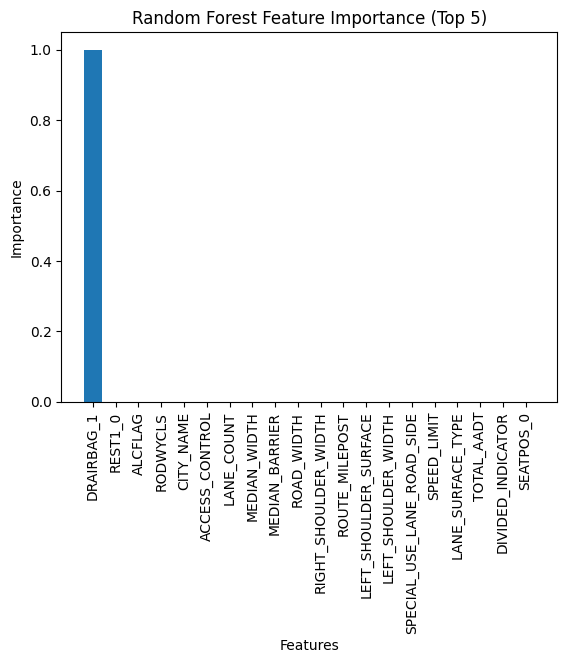

In [70]:
adb_step = adb_opt.best_estimator_.steps[1]
adb_model = adb_step[1]

import matplotlib.pyplot as plt
importances = adb_model.feature_importances_

sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_labels = X_test.columns[sorted_indices]

# Select top 5 importances and labels
top_n = 20
top_importances = sorted_importances[:top_n]
top_labels = sorted_labels[:top_n]

# Create a bar plot
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(range(len(top_importances)), top_labels, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance (Top 5)')
plt.show()

# CatBoostClassifier

In [39]:
from catboost import Pool, CatBoostClassifier

In [40]:
cb_estimators = [
    ('encoder', TargetEncoder()),
    ('clf', CatBoostClassifier()) # can customize objective function with the objective parameter
]
cb_pipe = Pipeline(steps=cb_estimators)
cb_pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 <catboost.core.CatBoostClassifier object at 0x317cf3350>)])

In [41]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

cb_search_space = {
    'clf__iterations': Integer(120,180),
    'clf__learning_rate': Real(1e-4, 1e-3),
    'clf__depth': Integer(2, 10)
}

cb_opt = BayesSearchCV(cb_pipe, cb_search_space, cv=3, n_iter=40, random_state=8) 

In [42]:
%%capture
cb_opt.fit(X_train, y1_train)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your model and made predictions on test data
predictions = cb_opt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y1_test, predictions)
print("Totol Injuries: Accuracy:", accuracy)

precision = precision_score(y1_test, predictions, average='weighted')
print("Totol Injuries: Precision:", precision)

recall = recall_score(y1_test, predictions, average='weighted')
print("Totol Injuries: Recall:", recall)

f1 = f1_score(y1_test, predictions, average='weighted')
print("Totol Injuries: F1:", f1)

Totol Injuries: Accuracy: 0.3527315914489311
Totol Injuries: Precision: 0.12441957560609565
Totol Injuries: Recall: 0.3527315914489311
Totol Injuries: F1: 0.18395308632191842


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
model_name = f'models/{cb_opt.best_estimator_.steps[1][1].__class__.__name__}_Total_Injuries_{accuracy:.2f}'
joblib.dump(cb_opt, f'{model_name}.pkl')
print(model_name)

import os
import re
last_model_name = [item for item in os.listdir('models') if item.startswith(f'{cb_opt.best_estimator_.steps[1][1].__class__.__name__}_Total_Injuries_')][0]
last_model_precision = float(re.findall(r'\d+\.\d+', last_model_name)[0])
print(last_model_name, last_model_precision)

if accuracy > last_model_precision:
    os.remove(f'models/{last_model_name}')
    joblib.dump(cb_opt, f'{model_name}.pkl')

models/CatBoostClassifier_Total_Injuries_0.35
CatBoostClassifier_Total_Injuries_0.35.pkl 0.35


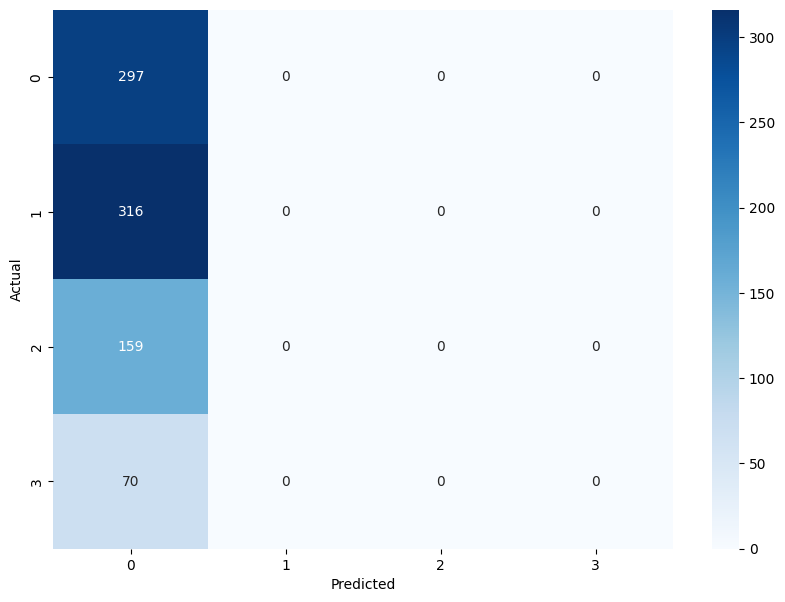

[[297   0   0   0]
 [316   0   0   0]
 [159   0   0   0]
 [ 70   0   0   0]]


In [45]:
try:
    confusion_matrix_plot(cb_opt, X_test, y1_test, 'TOT_INJ')
except:
    pass

Text(0.5, 1.0, 'Feature Importance')

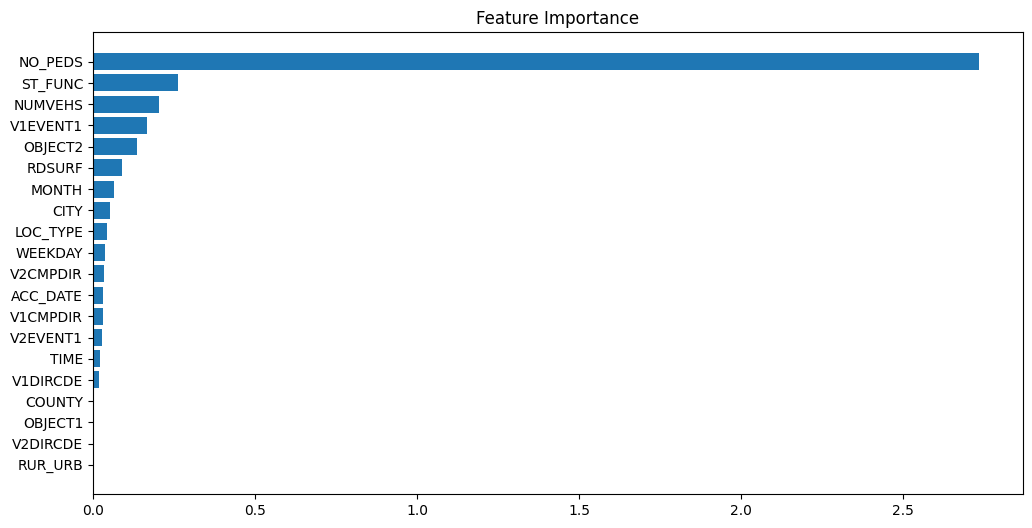

In [46]:
import numpy as np
feature_importance = cb_opt.best_estimator_.steps[1][1].feature_importances_[:20]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [79]:
%%capture
cb_opt.fit(X_train, y2_train)

In [80]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and made predictions on test data
predictions = cb_opt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y2_test, predictions)
print("Accident Type: Accuracy:", accuracy)

precision = precision_score(y2_test, predictions, average='weighted')
print("Accident Type: Precision:", precision)

recall = recall_score(y2_test, predictions, average='weighted')
print("Accident Type: Recall:", recall)

f1 = f1_score(y2_test, predictions, average='weighted')
print("Accident Type: F1:", f1)

Accident Type: Accuracy: 0.701840490797546
Accident Type: Precision: 0.6640414240834495
Accident Type: Recall: 0.701840490797546
Accident Type: F1: 0.6665406565769081


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
model_name = f'models/{cb_opt.best_estimator_.steps[1][1].__class__.__name__}_Accident_Type_{accuracy:.2f}'
joblib.dump(cb_opt, f'{model_name}.pkl')
print(model_name)

import os
import re

last_model_name = [item for item in os.listdir('models') if item.startswith(f'{cb_opt.best_estimator_.steps[1][1].__class__.__name__}_Accident_Type_')]
if len(last_model_name) == 0:
    joblib.dump(cb_opt, f'{model_name}.pkl')
else:
    last_model_precision = float(re.findall(r'\d+\.\d+', last_model_name[0])[0])
    print(last_model_name, last_model_precision)

    if accuracy > last_model_precision:
        os.remove(f'models/{last_model_name[0]}')
        joblib.dump(cb_opt, f'{model_name}.pkl')

models/CatBoostClassifier_Accident_Type_0.70
['CatBoostClassifier_Accident_Type_0.70.pkl'] 0.7


Text(0.5, 1.0, 'Feature Importance - AccType - Catboost')

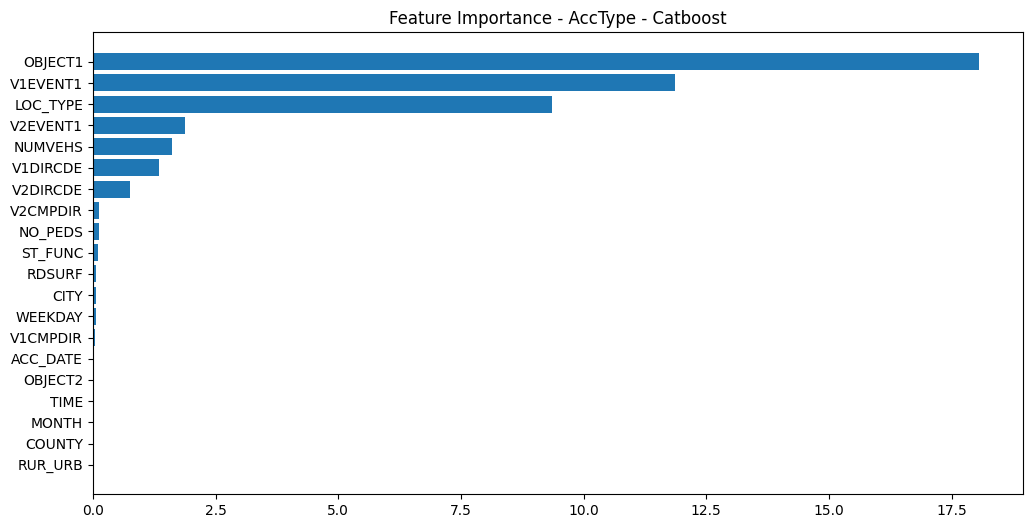

In [82]:
import numpy as np
feature_importance = cb_opt.best_estimator_.steps[1][1].feature_importances_[:20]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance - AccType - Catboost')

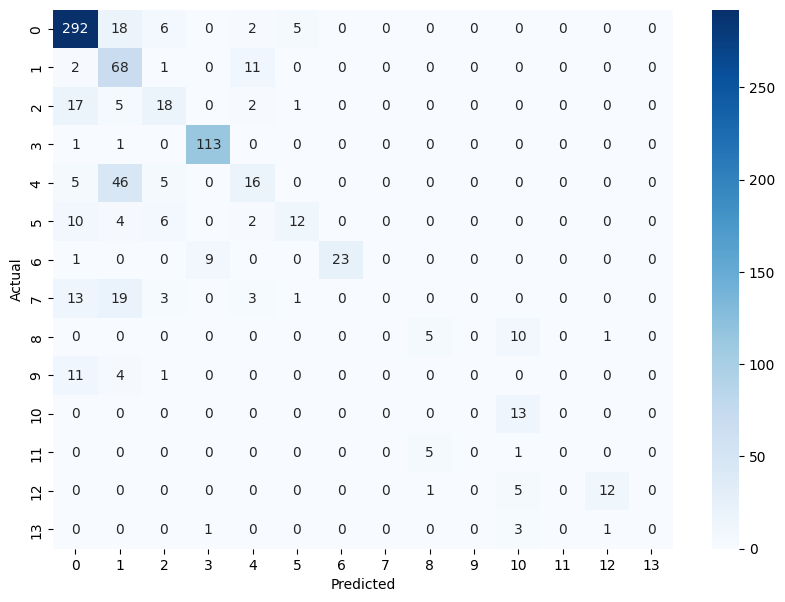

[[292  18   6   0   2   5   0   0   0   0   0   0   0   0]
 [  2  68   1   0  11   0   0   0   0   0   0   0   0   0]
 [ 17   5  18   0   2   1   0   0   0   0   0   0   0   0]
 [  1   1   0 113   0   0   0   0   0   0   0   0   0   0]
 [  5  46   5   0  16   0   0   0   0   0   0   0   0   0]
 [ 10   4   6   0   2  12   0   0   0   0   0   0   0   0]
 [  1   0   0   9   0   0  23   0   0   0   0   0   0   0]
 [ 13  19   3   0   3   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0  10   0   1   0]
 [ 11   4   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  13   0   0   0]
 [  0   0   0   0   0   0   0   0   5   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   5   0  12   0]
 [  0   0   0   1   0   0   0   0   0   0   3   0   1   0]]


In [83]:
try:
    confusion_matrix_plot(cb_opt, X_test, y2_test, 'ACCTYPE')
except:
    pass

In [84]:
%%capture
cb_opt.fit(X_train, y3_train)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have trained your model and made predictions on test data
predictions = cb_opt.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y3_test, predictions)
print("Severity: Accuracy:", accuracy)

precision = precision_score(y3_test, predictions, average='weighted')
print("Severity: Precision:", precision)

recall = recall_score(y3_test, predictions, average='weighted')
print("Severity: Recall:", recall)

f1 = f1_score(y3_test, predictions, average='weighted')
print("Severity: F1:", f1)


Severity: Accuracy: 0.33865030674846625
Severity: Precision: 0.11468403026083028
Severity: Recall: 0.33865030674846625
Severity: F1: 0.17134277665000308


/opt/anaconda3/envs/mlpy311/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
model_name = f'models/{cb_opt.best_estimator_.steps[1][1].__class__.__name__}_Severity_{accuracy:.2f}'
joblib.dump(cb_opt, f'{model_name}.pkl')
print(model_name)

import os
import re
last_model_name = [item for item in os.listdir('models') if item.startswith(f'{cb_opt.best_estimator_.steps[1][1].__class__.__name__}_Severity_')][0]
last_model_precision = float(re.findall(r'\d+\.\d+', last_model_name)[0])
print(last_model_name, last_model_precision)

if accuracy > last_model_precision:
    os.remove(f'models/{last_model_name}')
    joblib.dump(cb_opt, f'{model_name}.pkl')

models/CatBoostClassifier_Severity_0.34
CatBoostClassifier_Severity_0.34.pkl 0.34


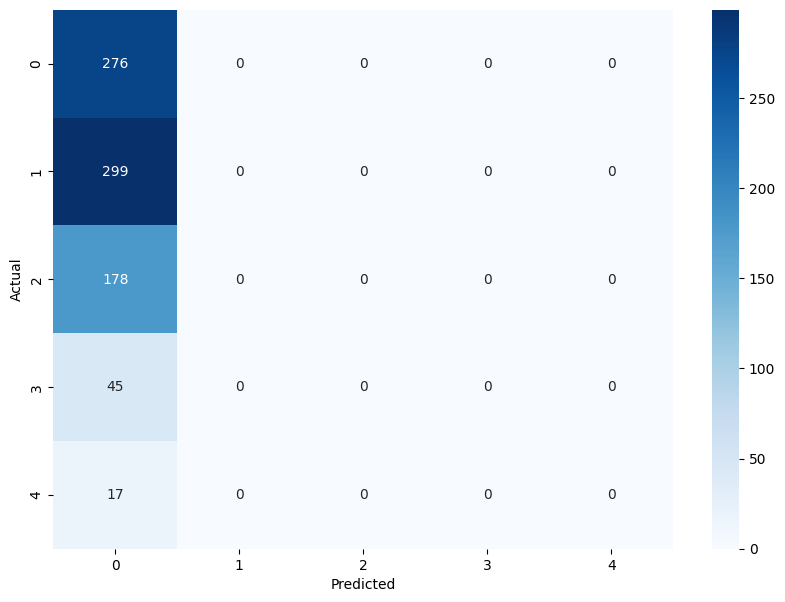

[[276   0   0   0   0]
 [299   0   0   0   0]
 [178   0   0   0   0]
 [ 45   0   0   0   0]
 [ 17   0   0   0   0]]


In [87]:
try:
    confusion_matrix_plot(cb_opt, X_test, y3_test, 'SEVERITY')
except:
    pass

Text(0.5, 1.0, 'Feature Importance - Severity - Catboost')

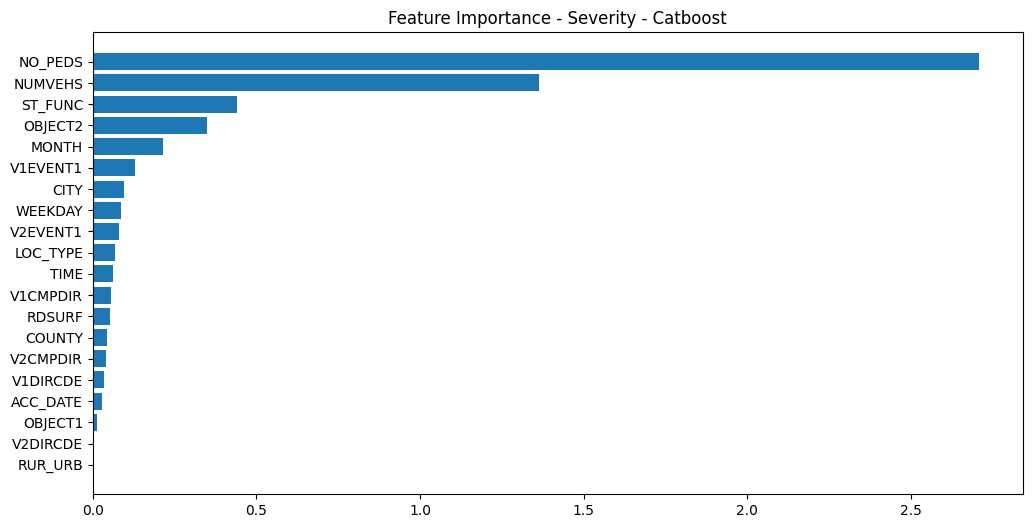

In [88]:
import numpy as np
feature_importance = cb_opt.best_estimator_.steps[1][1].feature_importances_[:20]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance - Severity - Catboost')